Import des libs & enregistrement du dataset COCO

In [1]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
import os


Enregistrer ton dataset

In [3]:
# Chemin vers ton dataset
dataset_path = "website_annotation.v2i.coco"

# Enregistrement des datasets COCO (train + valid)
register_coco_instances(
    "web_train", {}, 
    os.path.join(dataset_path, "train", "_annotations.coco.json"),
    os.path.join(dataset_path, "train")
)

register_coco_instances(
    "web_valid", {}, 
    os.path.join(dataset_path, "valid", "_annotations.coco.json"),
    os.path.join(dataset_path, "valid")
)

# Vérification
MetadataCatalog.get("web_train").thing_classes = [
    "html-balise-", "advertisement", "content", "footer",
    "header", "media", "sidebar", "title"
]
MetadataCatalog.get("web_valid").thing_classes = [
    "html-balise-", "advertisement", "content", "footer",
    "header", "media", "sidebar", "title"
]



Configurer le modèle Faster R-CNN

In [4]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("web_train",)
cfg.DATASETS.TEST = ("web_valid",)
cfg.DATALOADER.NUM_WORKERS = 2

# Utilise un modèle pré-entraîné
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")

cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # learning rate
cfg.SOLVER.MAX_ITER = 300     # ajustable (300 suffisant pour 11 images)
cfg.SOLVER.STEPS = []

cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 8  # nombre de classes

cfg.OUTPUT_DIR = "./output_detectron_web"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)


In [5]:
cfg.MODEL.DEVICE = "cpu"
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()


[04/03 13:07:17 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:49, 3.38MB/s]                              
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (9, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (9,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (32, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (32,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.bo

[04/03 13:08:07 d2.engine.train_loop]: Starting training from iteration 0


c:\Users\DELL\anaconda3\envs\detectron2-env\lib\site-packages\torch\functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ..\aten\src\ATen\native\TensorShape.cpp:3484.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[04/03 13:10:39 d2.utils.events]:  eta: 0:33:14  iter: 19  total_loss: 4.38  loss_cls: 2.123  loss_box_reg: 0.7307  loss_rpn_cls: 1.156  loss_rpn_loc: 0.376    time: 7.3106  last_time: 6.5089  data_time: 0.3070  last_data_time: 0.0031   lr: 1.6068e-05  
[04/03 13:14:05 d2.utils.events]:  eta: 0:33:58  iter: 39  total_loss: 3.425  loss_cls: 1.865  loss_box_reg: 0.7686  loss_rpn_cls: 0.49  loss_rpn_loc: 0.3884    time: 8.8291  last_time: 10.2010  data_time: 0.0038  last_data_time: 0.0033   lr: 3.2718e-05  
[04/03 13:17:41 d2.utils.events]:  eta: 0:33:48  iter: 59  total_loss: 2.631  loss_cls: 1.402  loss_box_reg: 0.7697  loss_rpn_cls: 0.2213  loss_rpn_loc: 0.3105    time: 9.5171  last_time: 15.2530  data_time: 0.0039  last_data_time: 0.0034   lr: 4.9367e-05  
[04/03 13:21:34 d2.utils.events]:  eta: 0:32:47  iter: 79  total_loss: 2.137  loss_cls: 0.9224  loss_box_reg: 0.7895  loss_rpn_cls: 0.1521  loss_rpn_loc: 0.2379    time: 10.0592  last_time: 7.6219  data_time: 0.0045  last_data_time:

In [28]:
model = trainer.model
print(model)


GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res2): Sequential(
        (0): BottleneckBlock

couches modifiées

In [29]:
print(model.roi_heads.box_predictor)


FastRCNNOutputLayers(
  (cls_score): Linear(in_features=1024, out_features=9, bias=True)
  (bbox_pred): Linear(in_features=1024, out_features=32, bias=True)
)


poids appris

In [32]:
# Poids de classification
print(model.roi_heads.box_predictor.cls_score.weight)

# Biais
print(model.roi_heads.box_predictor.cls_score.bias)


Parameter containing:
tensor([[-0.0037,  0.0012,  0.0043,  ...,  0.0043,  0.0057, -0.0087],
        [-0.0027,  0.0132, -0.0105,  ..., -0.0073, -0.0040, -0.0023],
        [ 0.0040, -0.0073, -0.0122,  ..., -0.0009, -0.0130,  0.0019],
        ...,
        [ 0.0117,  0.0072,  0.0046,  ...,  0.0028, -0.0014, -0.0023],
        [ 0.0041, -0.0122, -0.0075,  ...,  0.0048, -0.0036,  0.0029],
        [ 0.0043,  0.0021, -0.0048,  ...,  0.0085, -0.0044,  0.0018]],
       requires_grad=True)
Parameter containing:
tensor([-0.0043, -0.0017, -0.0006, -0.0007, -0.0010,  0.0048, -0.0019, -0.0031,
         0.0087], requires_grad=True)


In [ ]:
# pip install torchsummary


Note: you may need to restart the kernel to use updated packages.


In [ ]:
# # Enregistre les poids
# torch.save(model.state_dict(), "output_detectron_web/model_finetuned.pth")

# # Pour le recharger plus tard :
# model.load_state_dict(torch.load("output_detectron_web/model_finetuned.pth"))
# model.eval()


In [34]:
# from torchsummary import summary

# # Si tu es sur CPU :
# device = "cpu"
# model.to(device)

# # input shape : (3, H, W), ex: 640x640
# summary(model, (3, 640, 640))


[04/03 14:02:52 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output_detectron_web\model_final.pth ...


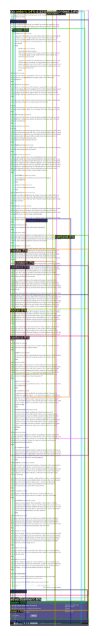

In [6]:
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
import cv2
import random
import matplotlib.pyplot as plt

# Charger le modèle entraîné
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
predictor = DefaultPredictor(cfg)

# Image test (ex : une image du dossier valid)
image_path = os.path.join(dataset_path, "valid", random.choice(os.listdir(os.path.join(dataset_path, "valid"))))
im = cv2.imread(image_path)

outputs = predictor(im)

v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(12, 8))
plt.imshow(out.get_image())
plt.axis("off")
plt.show()


In [7]:
from PIL import Image
import numpy as np

# Convertir l'image en format compatible avec PIL
pil_image = Image.fromarray(out.get_image())

# Afficher l'image
pil_image.show()

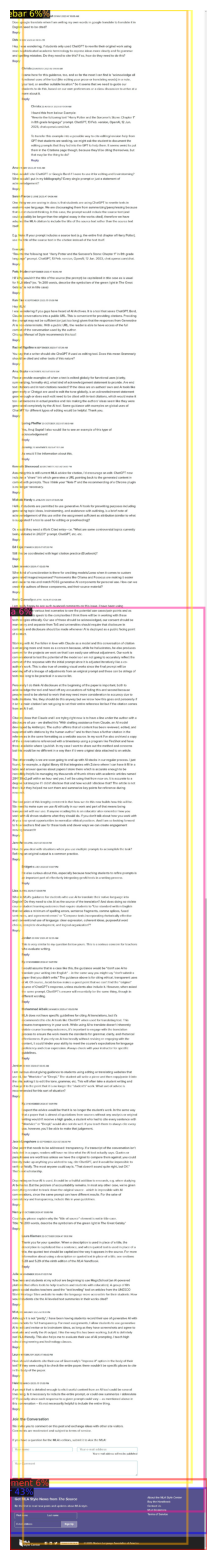

In [18]:
from detectron2.utils.visualizer import ColorMode

# Liste des classes concernées par le filtre max
unique_classes = ["title", "header", "footer", "content"]

# Charger une image test
valid_dir = os.path.join(dataset_path, "valid")
valid_images = [f for f in os.listdir(valid_dir) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
image_path = os.path.join(valid_dir, random.choice(valid_images))
im = cv2.imread(image_path)

# Prédiction
outputs = predictor(im)
instances = outputs["instances"].to("cpu")

# Récupération des infos
boxes = instances.pred_boxes.tensor.numpy()
scores = instances.scores.numpy()
classes = instances.pred_classes.numpy()

# Récupération des noms de classe
class_names = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes

# Dictionnaire pour stocker la meilleure box par classe
best_per_class = {}

for i in range(len(classes)):
    class_idx = classes[i]
    class_name = class_names[class_idx]
    score = scores[i]
    box = boxes[i]

    # Si la classe est concernée et c'est la meilleure box (ou la première)
    if class_name in unique_classes:
        if (class_name not in best_per_class) or (score > best_per_class[class_name][0]):
            best_per_class[class_name] = (score, box, class_idx)
    else:
        # Sinon on garde tout (media, sidebar, ads…)
        if "others" not in best_per_class:
            best_per_class["others"] = []
        best_per_class["others"].append((score, box, class_idx))

# Recréer la visualisation
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=0.8, instance_mode=ColorMode.IMAGE)

# Couleurs personnalisées par classe (en RGB)
class_colors = {
    "header": (0, 255, 0),        # Vert
    "footer": (0, 0, 255),        # Bleu
    "content": (255, 165, 0),     # Orange
    "title": (128, 0, 128),       # Violet
    "media": (255, 20, 147),      # Rose
    "advertisement": (255, 0, 0), # Rouge
    "sidebar": (255, 255, 0),     # Jaune
}

# Ajout des boxes avec couleurs personnalisées
for k, val in best_per_class.items():
    if k == "others":
        for score, box, class_idx in val:
            class_name = class_names[class_idx]
            color = class_colors.get(class_name, (255, 255, 255))  # Blanc par défaut
            color = tuple(c / 255 for c in color)  # Normalize to 0-1 range
            v.draw_box(box, edge_color=color)
            v.draw_text(f"{class_name} {int(score*100)}%", tuple(box[:2]), color=color)
    else:
        score, box, class_idx = val
        class_name = class_names[class_idx]
        color = class_colors.get(class_name, (255, 255, 255))  # Blanc par défaut
        color = tuple(c / 255 for c in color)  # Normalize to 0-1 range
        v.draw_box(box, edge_color=color)
        v.draw_text(f"{class_name} {int(score*100)}%", tuple(box[:2]), color=color)

# Affichage
out = v.output.get_image()
plt.figure(figsize=(12, 20))
plt.imshow(out)
plt.axis("off")
plt.show()


In [19]:
from PIL import Image
import numpy as np

# Convertir l'image en format compatible avec PIL
pil_image = Image.fromarray(out)

# Afficher l'image
pil_image.show()